# Data Preprocessing

### Join Cab_Data, Customer_ID, and Transaction_ID Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_2588\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read Cab_Data
cab_data = pd.read_csv("Cab_Data.csv")
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID
0,10000011,2016/1/8,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290
1,10000012,2016/1/6,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703
2,10000013,2016/1/2,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712
3,10000014,2016/1/7,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020
4,10000015,2016/1/3,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182


In [3]:
# Read Customer_ID data
Customer_Data = pd.read_csv("Customer_ID.csv")
Customer_Data.head()

,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,29290,Male,28,10813,Card
1,27703,Male,27,9237,Card
2,28712,Male,53,11242,Cash
3,28020,Male,23,23327,Cash
4,27182,Male,33,8536,Card


In [4]:
# Join two dataset
transaction_data = pd.merge(cab_data, Customer_Data, on='Customer ID', how='inner')
transaction_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016/1/8,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card
1,10000012,2016/1/6,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card
2,10000013,2016/1/2,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash
3,10000014,2016/1/7,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash
4,10000015,2016/1/3,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018/1/8,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Male,24,15651,Card
359388,10440104,2018/1/4,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Card
359389,10440105,2018/1/5,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash
359390,10440106,2018/1/5,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Cash


In [5]:
# Check NA values
transaction_data.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Payment_Mode          0
dtype: int64

In [6]:
category_columns = ['Company', 'City', 'Gender', 'Age', 'Income (USD/Month)', 'Payment_Mode']
for column in category_columns:
    print(f"Column:{column}, Value Counts:{transaction_data[column].value_counts()}")

Column:Company, Value Counts:Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64
Column:City, Value Counts:City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64
Column:Gender, Value Counts:Gender
Male      205912
Female    153480
Name: count, dtype: int64
Column:Age, Value Counts:Age
23    12327
20    12229
27    12030
25    11973
32    11959
34    11825
39    11798
22    11796
26    11655
19    11591
40    11536
33    11457
21    11431
30    11165
28    11163
24    11151
37    11086
36    11054
31    10930
38    10906
18    10846
29    

In [7]:
# Descriptive Analysis
drop_col = ["Transaction ID","Date of Travel"]
describe_data = transaction_data.drop(drop_col, axis = 1)
describe_data.describe()

,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [8]:
# Binned Age
bins = [18, 30, 40, 50, 65]
labels = ['18-30', '31-40', '41-50', '51-65']

# Replace 'Age' with new binned values
transaction_data['Age'] = pd.cut(transaction_data['Age'], bins=bins, labels=labels, right=False)
transaction_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016/1/8,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,18-30,10813,Card
1,10000012,2016/1/6,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,18-30,9237,Card
2,10000013,2016/1/2,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,51-65,11242,Cash
3,10000014,2016/1/7,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,18-30,23327,Cash
4,10000015,2016/1/3,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,31-40,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018/1/8,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Male,18-30,15651,Card
359388,10440104,2018/1/4,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,31-40,6528,Card
359389,10440105,2018/1/5,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,51-65,7966,Cash
359390,10440106,2018/1/5,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,31-40,6423,Cash


In [9]:
# Binned Income (USD/Month)
bins = [2000, 8400, 15000, 21000, 35000]  #According to Quantile statistics
labels = ['Bottom 25% (<8400)', 'Between 25%-50% (8400~15000)', 'Between 50%-75% (15000~21000)', 'top 25% (>21000)']

# Replace 'Income (USD/Month)' with new binned values
transaction_data['Income (USD/Month)'] = pd.cut(transaction_data['Income (USD/Month)'], bins=bins, labels=labels, right=False)
transaction_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016/1/8,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,18-30,Between 25%-50% (8400~15000),Card
1,10000012,2016/1/6,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,18-30,Between 25%-50% (8400~15000),Card
2,10000013,2016/1/2,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,51-65,Between 25%-50% (8400~15000),Cash
3,10000014,2016/1/7,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,18-30,top 25% (>21000),Cash
4,10000015,2016/1/3,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,31-40,Between 25%-50% (8400~15000),Card
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018/1/8,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Male,18-30,Between 50%-75% (15000~21000),Card
359388,10440104,2018/1/4,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,31-40,Bottom 25% (<8400),Card
359389,10440105,2018/1/5,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,51-65,Bottom 25% (<8400),Cash
359390,10440106,2018/1/5,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,31-40,Bottom 25% (<8400),Cash


In [10]:
def check_type(data):
    for column in data.columns:
        print(f"Column:{column}, Type:{data[column].dtype}")

check_type(transaction_data)

Column:Transaction ID, Type:int64
Column:Date of Travel, Type:object
Column:Company, Type:object
Column:City, Type:object
Column:KM Travelled, Type:float64
Column:Price Charged, Type:float64
Column:Cost of Trip, Type:float64
Column:Customer ID, Type:int64
Column:Gender, Type:object
Column:Age, Type:category
Column:Income (USD/Month), Type:category
Column:Payment_Mode, Type:object


In [11]:
# Convert Date of Travel to datetime
transaction_data["Date of Travel"] = pd.to_datetime(transaction_data["Date of Travel"])

# Convert categorical columns to 'category' type
category_columns = ['Company','City','Gender','Payment_Mode']
for column in category_columns:
    transaction_data[column] = transaction_data[column].astype('category')

check_type(transaction_data)

Column:Transaction ID, Type:int64
Column:Date of Travel, Type:datetime64[ns]
Column:Company, Type:category
Column:City, Type:category
Column:KM Travelled, Type:float64
Column:Price Charged, Type:float64
Column:Cost of Trip, Type:float64
Column:Customer ID, Type:int64
Column:Gender, Type:category
Column:Age, Type:category
Column:Income (USD/Month), Type:category
Column:Payment_Mode, Type:category


In [12]:
len(transaction_data)

359392

In [13]:
# Check whether duplicated rows exist
transaction_data[transaction_data.duplicated()]

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode


In [14]:
# Check outlier for columns of numeric values through z-score
# KM Travelled	Price Charged	Cost of Trip

def numeric_outlier(column):
    mean = column.mean()
    std = column.std()
    threshold = 3
    z_score = (column - mean)/std
    outlier = transaction_data[np.abs(z_score) > threshold]
    return outlier  #True for outliers

KM_outlier = numeric_outlier(transaction_data["KM Travelled"])
KM_outlier

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode


In [15]:
price_outlier = numeric_outlier(transaction_data["Price Charged"])
price_outlier

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
233,10000384,2016-01-02,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Male,18-30,Between 25%-50% (8400~15000),Card
234,10000385,2016-01-09,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,27594,Male,18-30,Bottom 25% (<8400),Cash
237,10000388,2016-01-07,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,29039,Male,31-40,Between 50%-75% (15000~21000),Card
247,10000398,2016-01-02,Yellow Cab,ATLANTA GA,38.85,1430.64,545.4540,29558,Male,18-30,Between 25%-50% (8400~15000),Cash
504,10000655,2016-01-02,Yellow Cab,DALLAS TX,45.60,1519.56,585.5040,24950,Male,31-40,Between 50%-75% (15000~21000),Card
...,...,...,...,...,...,...,...,...,...,...,...,...
355815,10435346,2018-12-28,Yellow Cab,NEW YORK NY,44.85,1294.55,575.8740,1698,Male,18-30,top 25% (>21000),Card
356044,10435583,2018-12-28,Yellow Cab,NEW YORK NY,40.70,1258.67,527.4720,443,Female,31-40,Between 25%-50% (8400~15000),Card
356234,10435777,2018-12-29,Yellow Cab,NEW YORK NY,43.70,1250.09,608.3040,2385,Male,31-40,top 25% (>21000),Card
356286,10435832,2018-12-28,Yellow Cab,NEW YORK NY,46.02,1278.24,579.8520,1697,Female,31-40,Between 25%-50% (8400~15000),Card


In [16]:
price_outlier["City"].unique()
# Seems that these outliers do not gather in a specific city

['ATLANTA GA', 'DALLAS TX', 'NEW YORK NY', 'SAN DIEGO CA', 'SEATTLE WA', ..., 'MIAMI FL', 'CHICAGO IL', 'PITTSBURGH PA', 'TUCSON AZ', 'NASHVILLE TN']
Length: 16
Categories (19, object): ['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', ..., 'SEATTLE WA', 'SILICON VALLEY', 'TUCSON AZ', 'WASHINGTON DC']

In [17]:
index_outlier = price_outlier.index
transaction_data = transaction_data.drop(index_outlier)
len(transaction_data)

356197

In [18]:
cost_outlier = numeric_outlier(transaction_data["Cost of Trip"])
cost_outlier

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode


In [19]:
# Descriptive Analysis
drop_col = ["Transaction ID","Date of Travel"]
describe_data = transaction_data.drop(drop_col, axis = 1)
describe_data.describe()

,KM Travelled,Price Charged,Cost of Trip,Customer ID
count,356197.000000,356197.000000,356197.000000,356197.000000
mean,22.399007,414.887334,283.865913,19342.117005
std,12.152762,259.985644,156.674710,21041.044181
min,1.900000,15.600000,19.000000,1.000000
25%,11.880000,204.860000,150.072000,2764.000000
50%,22.260000,383.180000,280.051200,7547.000000
75%,32.640000,577.280000,410.130000,36373.000000
max,48.000000,1246.560000,691.200000,60000.000000


### City Dataset

In [20]:
# Read City dataset
city_data = pd.read_csv("City.csv")
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [21]:
# Check NA values
city_data.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [42]:
# Check data type
check_type(city_data)

Column:City, Type:category
Column:Population, Type:category
Column:Users, Type:category


In [45]:
city_data['Users'] = city_data['Users'].str.strip().str.replace(',', '').astype(int)
city_data['Population'] = city_data['Population'].str.strip().str.replace(',', '').astype(int)

In [46]:
# Check data type
check_type(city_data)

Column:City, Type:category
Column:Population, Type:int32
Column:Users, Type:int32


In [47]:
# Check whether duplicated rows exist
city_data[city_data.duplicated()]

,City,Population,Users


In [48]:
transaction_data.to_csv('transaction_data.csv', index=False)

In [49]:
city_data.to_csv('city_data.csv', index=False)

# Visualization

In [50]:
# Add Profit Column
transaction_data['Profit'] = transaction_data['Price Charged'] - transaction_data['Cost of Trip']

columns = list(transaction_data.columns)
cost_index = columns.index('Cost of Trip')
columns.remove('Profit')
columns.insert(cost_index + 1, 'Profit')
transaction_data = transaction_data[columns]

transaction_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Male,18-30,Between 25%-50% (8400~15000),Card,2016
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Male,18-30,Between 25%-50% (8400~15000),Card,2016
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,28712,Male,51-65,Between 25%-50% (8400~15000),Cash,2016
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,28020,Male,18-30,top 25% (>21000),Cash,2016
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,27182,Male,31-40,Between 25%-50% (8400~15000),Card,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,52392,Male,18-30,Between 50%-75% (15000~21000),Card,2018
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,53286,Male,31-40,Bottom 25% (<8400),Card,2018
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,52265,Male,51-65,Bottom 25% (<8400),Cash,2018
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,52175,Male,31-40,Bottom 25% (<8400),Cash,2018


## Hypothesis 1: 
### Which company had higher transaction amounts from 2016 to 2018?

C:\Users\User\AppData\Local\Temp\ipykernel_2588\2614654464.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_counts = transaction_data.groupby(['Company', 'Year']).size().reset_index(name='Transactions')  #size: count the number of elements


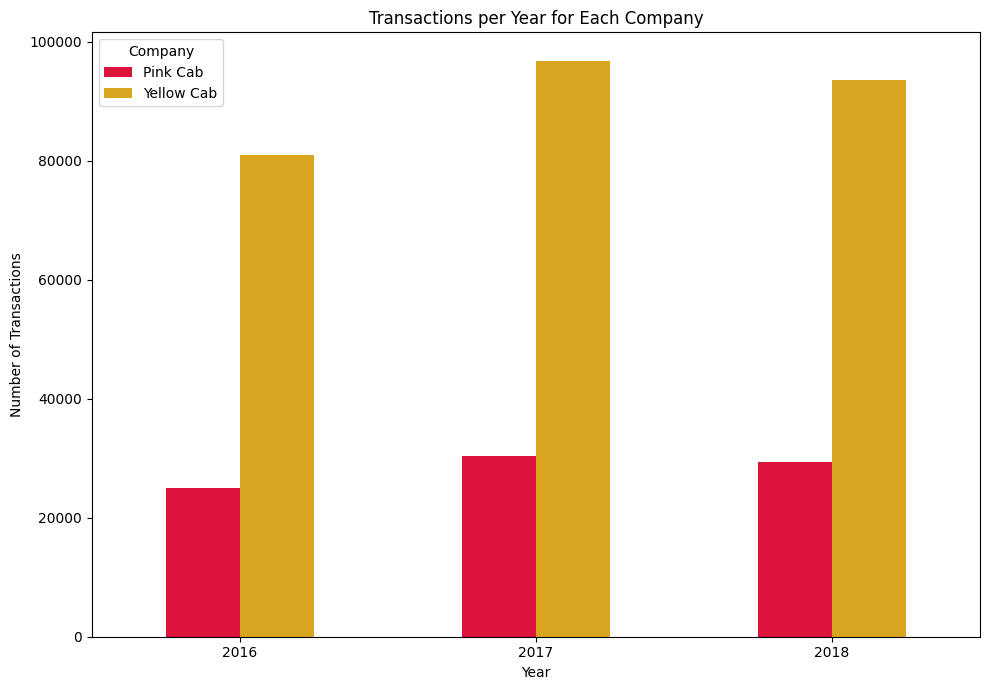

In [51]:
# Plot Annual Passengers for each Company
# Add year from 'Date of Travel'
transaction_data['Year'] = transaction_data['Date of Travel'].dt.year

# Group by "Company" and "Year" and count the number of transactions
transaction_counts = transaction_data.groupby(['Company', 'Year']).size().reset_index(name='Transactions')  #size: count the number of elements

# Pivot the data for plotting
pivot_df = transaction_counts.pivot(index='Year', columns='Company', values='Transactions').fillna(0)

# Plotting
pivot_df.plot(kind='bar', figsize=(10, 7), color=['crimson', 'goldenrod'])
plt.title('Transactions per Year for Each Company')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Company')
plt.tight_layout()

plt.show()


## Hypothesis 2: 
### Which company charges a higher average price per trip annually?

C:\Users\User\AppData\Local\Temp\ipykernel_2588\1194621410.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_data = transaction_data.groupby(['Company', 'Year'])['Price Charged'].mean().reset_index()


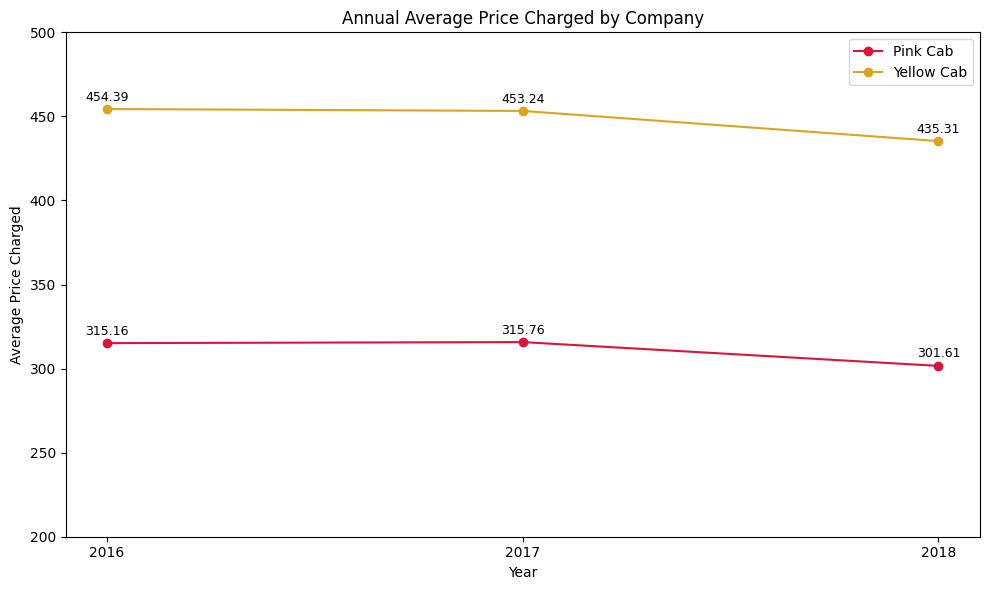

In [52]:
# Plot Annual Average Price Charged by Company
# Group by 'Company' and 'Year' and calculate the mean price charged
price_data = transaction_data.groupby(['Company', 'Year'])['Price Charged'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Pink Cab': 'crimson', 'Yellow Cab': 'goldenrod'}
for company in price_data['Company'].unique():
    company_data = price_data[price_data['Company'] == company]
    ax.plot(company_data['Year'], company_data['Price Charged'], marker='o', label=company, color=colors[company])
    # Add numbers on plot
    space = 5  # Adjust this value as needed to position the text above the line
    for year, price in zip(company_data['Year'], company_data['Price Charged']):
        ax.text(year, price + space, f"{price:.2f}", color='black', fontsize=9, ha='center')

ax.set_title('Annual Average Price Charged by Company')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price Charged')
ax.legend()
plt.xticks(company_data['Year'].unique())
plt.ylim(200, 500)
plt.tight_layout()
plt.show()

## Hypothesis 3: 
### Which company incurs a higher average cost per trip annually?

C:\Users\User\AppData\Local\Temp\ipykernel_2588\2563277210.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cost_data = transaction_data.groupby(['Company', 'Year'])['Cost of Trip'].mean().reset_index()


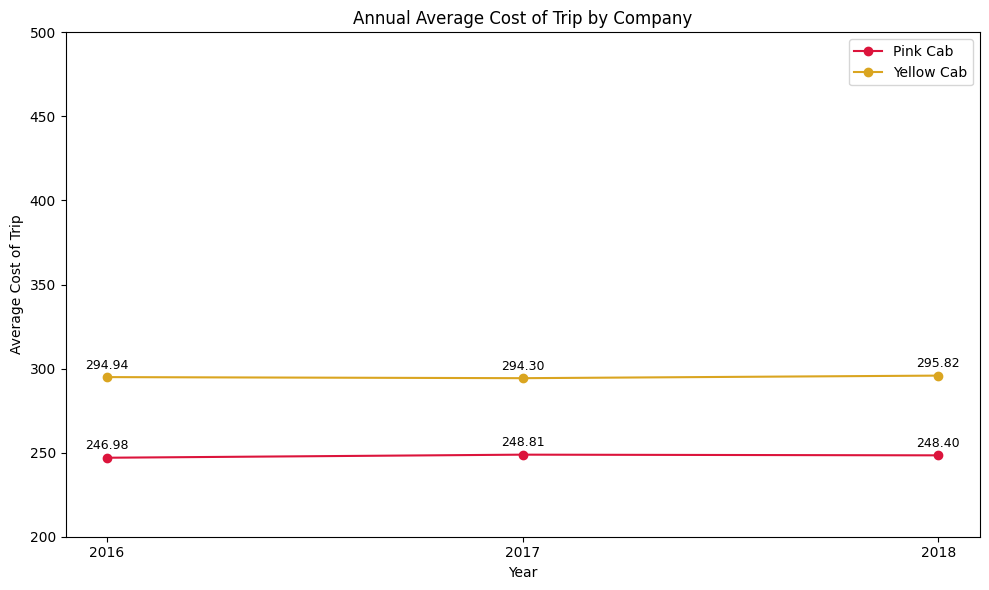

In [53]:
# Plot Annual Average Cost of Trip by Company
# Group by 'Company' and 'Year' and calculate the mean Cost of Trip
cost_data = transaction_data.groupby(['Company', 'Year'])['Cost of Trip'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Pink Cab': 'crimson', 'Yellow Cab': 'goldenrod'}
for company in cost_data['Company'].unique():
    company_data = cost_data[cost_data['Company'] == company]
    ax.plot(company_data['Year'], company_data['Cost of Trip'], marker='o', label=company, color=colors[company])
    # Add numbers on plot
    space = 5  # Adjust this value as needed to position the text above the line
    for year, cost in zip(company_data['Year'], company_data['Cost of Trip']):
        ax.text(year, cost + space, f"{cost:.2f}", color='black', fontsize=9, ha='center')

ax.set_title('Annual Average Cost of Trip by Company')
ax.set_xlabel('Year')
ax.set_ylabel('Average Cost of Trip')
ax.legend()
plt.xticks(company_data['Year'].unique())
plt.ylim(200, 500)
plt.tight_layout()
plt.show()

## Hypothesis 4: 
### Which company achieves a higher average profit per trip annually?

C:\Users\User\AppData\Local\Temp\ipykernel_2588\117809653.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Profit_data = transaction_data.groupby(['Company', 'Year'])['Profit'].mean().reset_index()


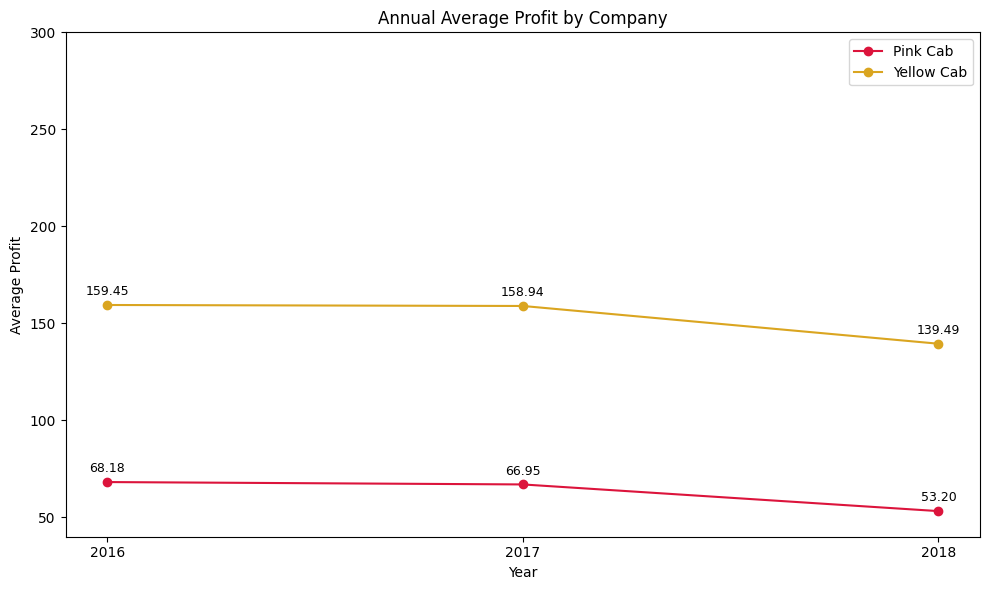

In [54]:
# Plot Annual Average Profit by Company
# Group by 'Company' and 'Year' and calculate the mean Profit
Profit_data = transaction_data.groupby(['Company', 'Year'])['Profit'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Pink Cab': 'crimson', 'Yellow Cab': 'goldenrod'}
for company in Profit_data['Company'].unique():
    company_data = Profit_data[Profit_data['Company'] == company]
    ax.plot(company_data['Year'], company_data['Profit'], marker='o', label=company, color=colors[company])
    # Add numbers on plot
    space = 5  # Adjust this value as needed to position the text above the line
    for year, profit in zip(company_data['Year'], company_data['Profit']):
        ax.text(year, profit + space, f"{profit:.2f}", color='black', fontsize=9, ha='center')

ax.set_title('Annual Average Profit by Company')
ax.set_xlabel('Year')
ax.set_ylabel('Average Profit')
ax.legend()
plt.xticks(company_data['Year'].unique())
plt.ylim(40, 300)  # Adjust as per your data's requirement
plt.tight_layout()
plt.show()

## Hypothesis 5: 
### Which company has accumulated higher total profits from 2016 to 2018?

C:\Users\User\AppData\Local\Temp\ipykernel_2588\2325239246.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Profit_data = transaction_data.groupby(['Company', 'Year'])['Profit'].sum().reset_index()


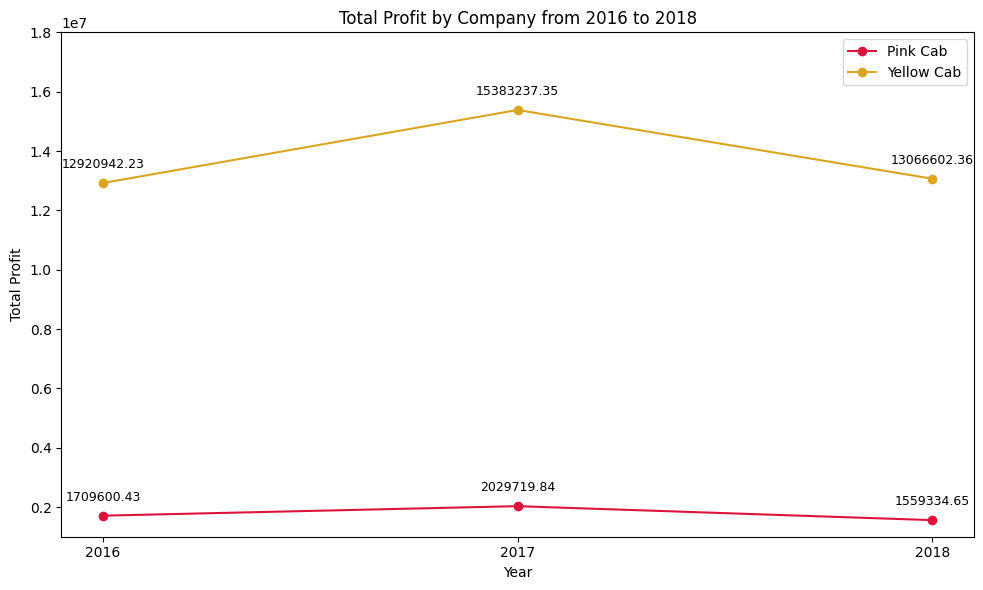

In [55]:
# Plot Annual Total Profit by Company
# Group by 'Company' and 'Year' and calculate the mean Profit
Profit_data = transaction_data.groupby(['Company', 'Year'])['Profit'].sum().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Pink Cab': 'crimson', 'Yellow Cab': 'goldenrod'}
for company in Profit_data['Company'].unique():
    company_data = Profit_data[Profit_data['Company'] == company]
    ax.plot(company_data['Year'], company_data['Profit'], marker='o', label=company, color=colors[company])
    # Add numbers on plot
    space = 500000  # Adjust this value as needed to position the text above the line
    for year, profit in zip(company_data['Year'], company_data['Profit']):
        ax.text(year, profit + space, f"{profit:.2f}", color='black', fontsize=9, ha='center')

ax.set_title('Total Profit by Company from 2016 to 2018')
ax.set_xlabel('Year')
ax.set_ylabel('Total Profit')
ax.legend()
plt.xticks(company_data['Year'].unique())
plt.ylim(1000000, 18000000)
plt.tight_layout()
plt.show()

## Hypothesis 6: 
### What are the demographic segments for each company? (Gender, Age, Income Groups)

C:\Users\User\AppData\Local\Temp\ipykernel_2588\2884645417.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_count = transaction_data.groupby(['Company', 'Gender']).size().unstack()


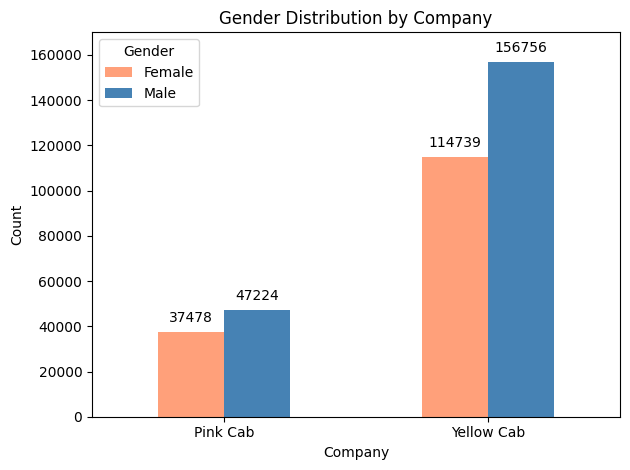

In [56]:
# Gender Distribution by Company
gender_count = transaction_data.groupby(['Company', 'Gender']).size().unstack()

# Plotting
fig, ax = plt.subplots()
gender_count.plot(kind='bar', stacked=False, color=['lightsalmon', 'steelblue'], ax=ax)
plt.title('Gender Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.ylim(0, 170000)
plt.xticks(rotation=0) 
plt.legend(title='Gender')

# Add numbers in the plot
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2588\677224601.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_gender = transaction_data.groupby(['Company', 'Gender'])['Profit'].sum().unstack()


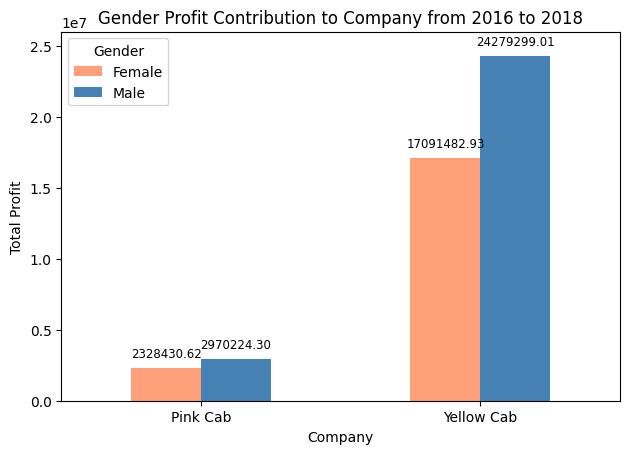

In [57]:
# Profit of gender contributed to company
profit_by_gender = transaction_data.groupby(['Company', 'Gender'])['Profit'].sum().unstack()

# Plotting
fig, ax = plt.subplots()
profit_by_gender.plot(kind='bar', stacked=False, color=['lightsalmon', 'steelblue'], ax=ax)
plt.title('Gender Profit Contribution to Company from 2016 to 2018')
plt.xlabel('Company')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)  
plt.ylim(0, 26000000)
plt.legend(title='Gender')

# Add profit numbers in plot
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8.5)

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2588\3697479665.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_count = transaction_data.groupby(['Company', 'Age']).size().unstack()


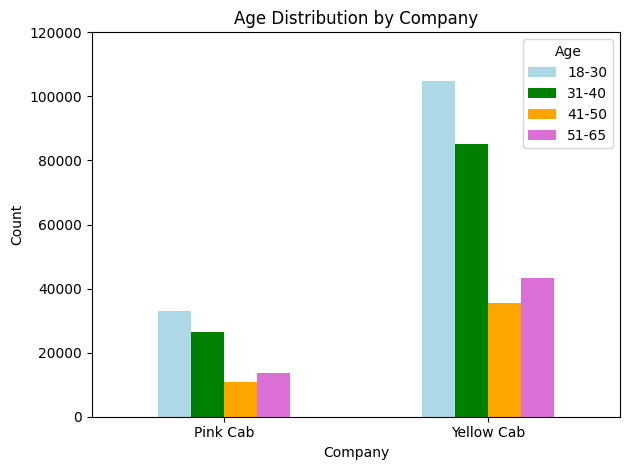

In [58]:
# Age Distribution by Company
age_count = transaction_data.groupby(['Company', 'Age']).size().unstack()

# Plotting
fig, ax = plt.subplots()
age_count.plot(kind='bar', stacked=False, color=['lightblue', 'green', 'orange', 'orchid'], ax=ax)
plt.title('Age Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.ylim(0, 120000)
plt.xticks(rotation=0) 
plt.legend(title='Age')

# Add numbers in the plot
#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
#                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8.5)

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2588\2590657989.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_age = transaction_data.groupby(['Company', 'Age'])['Profit'].sum().unstack()


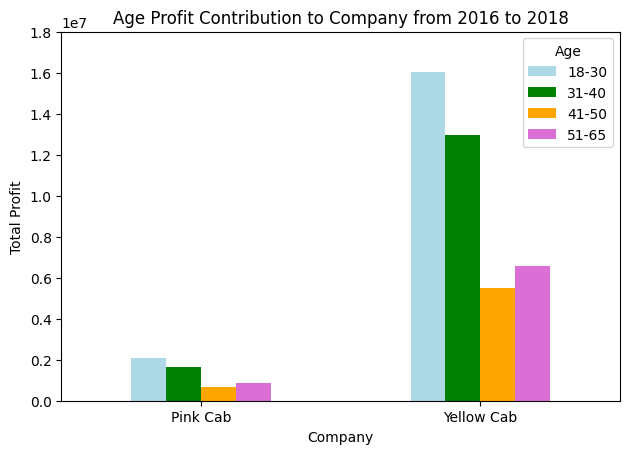

In [59]:
# Profit of Age contributed to company
profit_by_age = transaction_data.groupby(['Company', 'Age'])['Profit'].sum().unstack()

# Plotting
fig, ax = plt.subplots()
profit_by_age.plot(kind='bar', stacked=False, color=['lightblue', 'green', 'orange', 'orchid'], ax=ax)
plt.title('Age Profit Contribution to Company from 2016 to 2018')
plt.xlabel('Company')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)  
plt.ylim(0, 18000000)
plt.legend(title='Age')


plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2588\3739134727.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_count = transaction_data.groupby(['Company', 'Income (USD/Month)']).size().unstack()


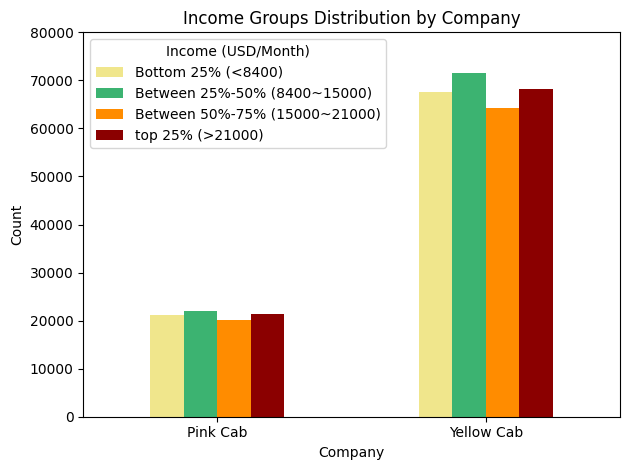

In [60]:
# Income Distribution by Company
income_count = transaction_data.groupby(['Company', 'Income (USD/Month)']).size().unstack()

# Plotting
fig, ax = plt.subplots()
income_count.plot(kind='bar', stacked=False, color=['khaki', '#3CB371', 'darkorange', '#8B0000'], ax=ax)
plt.title('Income Groups Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.ylim(0, 80000)
plt.xticks(rotation=0) 
plt.legend(title='Income (USD/Month)')


plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2588\2674439598.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_income = transaction_data.groupby(['Company', 'Income (USD/Month)'])['Profit'].sum().unstack()


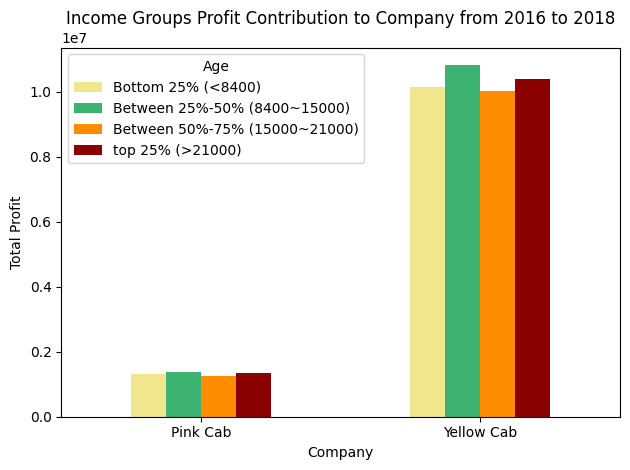

In [61]:
# Profit of Income Groups contributed to company
profit_by_income = transaction_data.groupby(['Company', 'Income (USD/Month)'])['Profit'].sum().unstack()

# Plotting
fig, ax = plt.subplots()
profit_by_income.plot(kind='bar', stacked=False, color=['khaki', '#3CB371', 'darkorange', '#8B0000'], ax=ax)
plt.title('Income Groups Profit Contribution to Company from 2016 to 2018')
plt.xlabel('Company')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)  
#plt.ylim(0, 18000000)
plt.legend(title='Age')


plt.tight_layout()
plt.show()

In [62]:
city_data['Users_percentage'] = (city_data['Users']/city_data['Population'])*100
city_data

,City,Population,Users,Users_percentage
0,NEW YORK NY,8405837,302149,3.594514
1,CHICAGO IL,1955130,164468,8.412126
2,LOS ANGELES CA,1595037,144132,9.036279
3,MIAMI FL,1339155,17675,1.319862
4,SILICON VALLEY,1177609,27247,2.313756
5,ORANGE COUNTY,1030185,12994,1.261327
6,SAN DIEGO CA,959307,69995,7.296413
7,PHOENIX AZ,943999,6133,0.649683
8,DALLAS TX,942908,22157,2.349858
9,ATLANTA GA,814885,24701,3.031225


## Hypothesis 7: 
### How do the two companies compare in terms of profit generation across different cities?

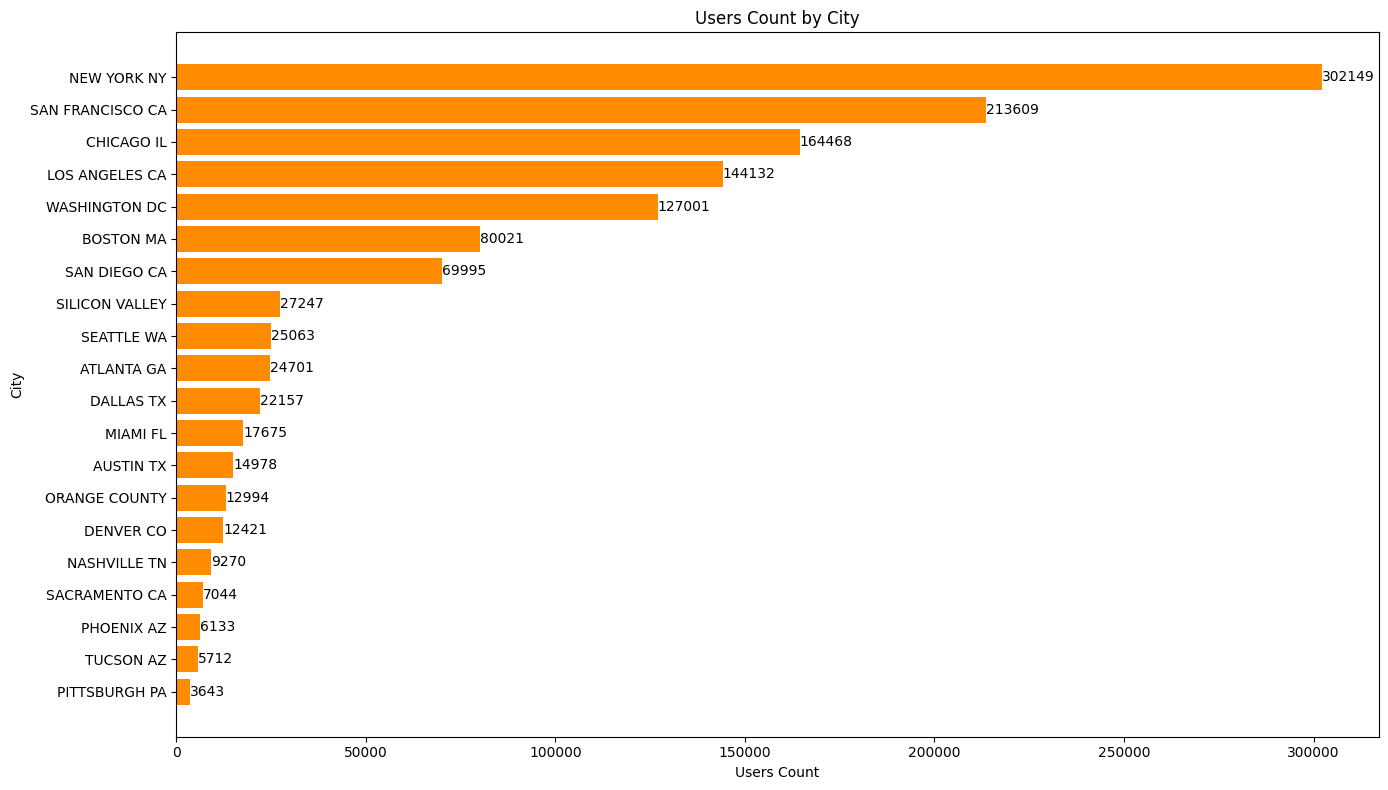

In [63]:
# Horizontal bar plot for users by each city
user_sorted = city_data.sort_values(by='Users', ascending=False)

plt.figure(figsize=(14, 8))
bars = plt.barh(user_sorted['City'], user_sorted['Users'], color='darkorange')

# Add the numbers to the bars
for bar in bars:
    plt.text(
        bar.get_width(),       # Get the horizontal position of the text (end of the bar)
        bar.get_y() + bar.get_height()/2,  # Get the vertical position of the text (middle of the bar)
        int(bar.get_width()),  # The text (user count)
        va='center'            # Center alignment for the vertical position
    )

plt.xlabel('Users Count')
plt.ylabel('City')
plt.title('Users Count by City')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()


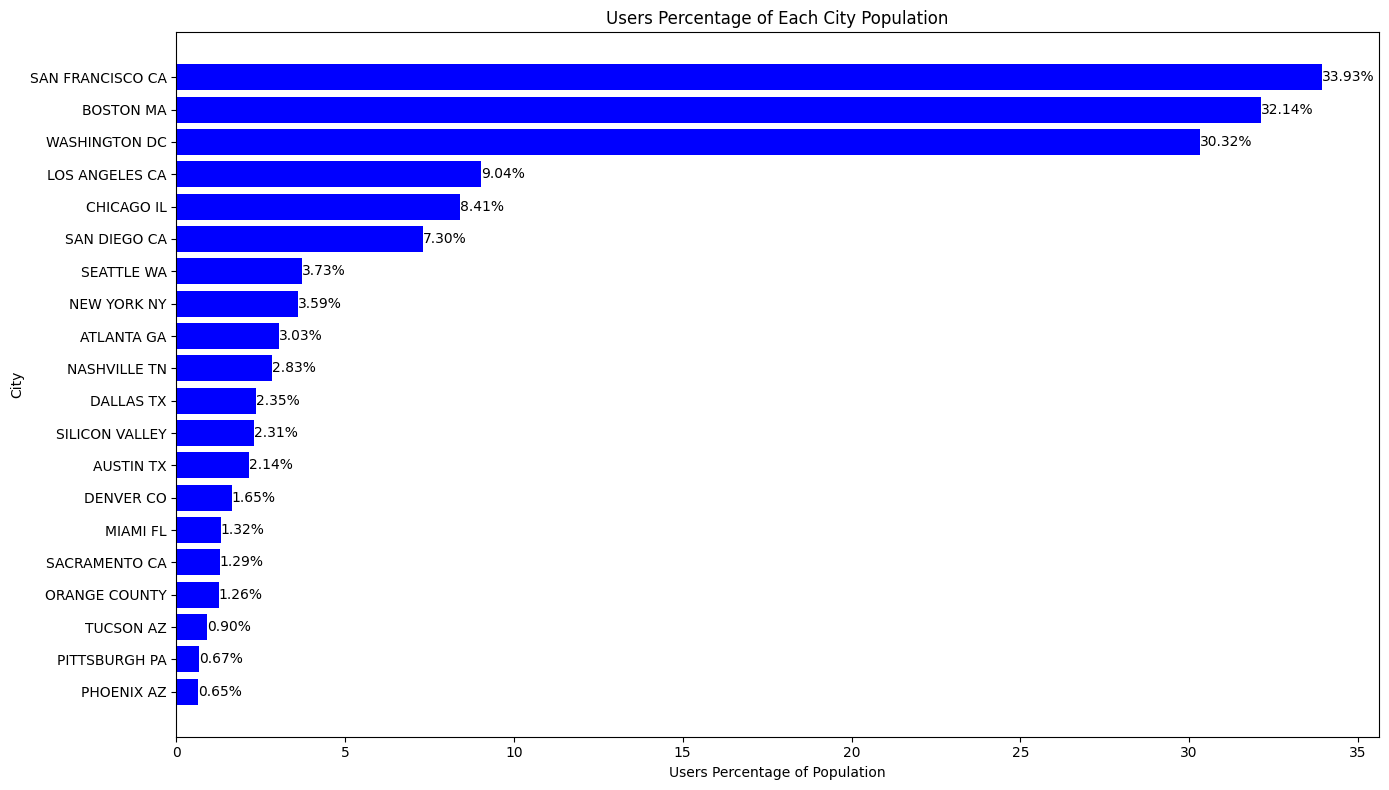

In [64]:
# Horizontal bar plot for percentage of users from population by each city
percentage_sorted = city_data.sort_values(by='Users_percentage', ascending=False)

# Generate the horizontal bar plot with numbers on the bars
plt.figure(figsize=(14, 8))
bars = plt.barh(percentage_sorted['City'], percentage_sorted['Users_percentage'], color='blue')

# Add the numbers to the bars
for bar in bars:
    plt.text(
        bar.get_width(),              # Get the horizontal position of the text (end of the bar)
        bar.get_y() + bar.get_height()/2,  # Get the vertical position of the text (middle of the bar)
        f"{bar.get_width():.2f}%",    # The text (percentage), formatted to 2 decimal places
        va='center'                   # Center alignment for the vertical position
    )

plt.xlabel('Users Percentage of Population')
plt.ylabel('City')
plt.title('Users Percentage of Each City Population')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_2588\1899854909.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = transaction_data.groupby(['City', 'Company'])['Profit'].sum().unstack().fillna(0)


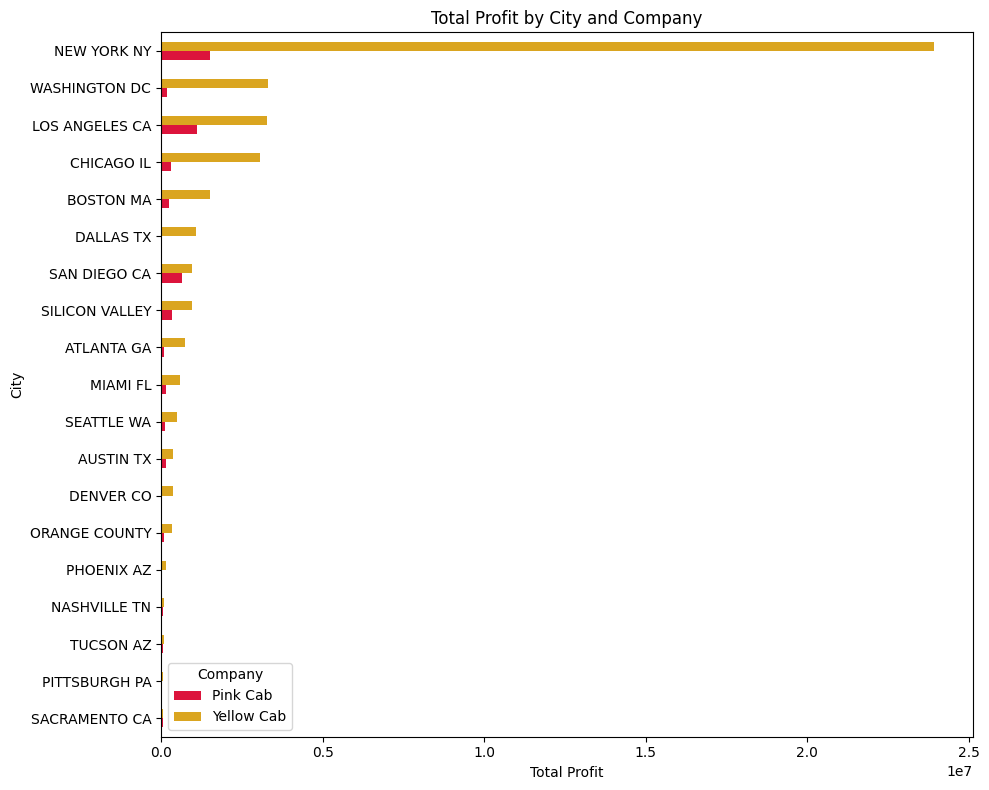

In [65]:
# Plot for Total Profit by City and Company
# Grouping by City and Company to calculate total profit
grouped_df = transaction_data.groupby(['City', 'Company'])['Profit'].sum().unstack().fillna(0)

# Adjusting colors for the companies and sorting by Yellow Cab's total profit
colors = {'Pink Cab': 'crimson', 'Yellow Cab': 'goldenrod'}

# Sorting the dataframe by Yellow Cab's total profit
sorted_df = grouped_df.sort_values(by='Yellow Cab', ascending=True)

# Plotting with the specified colors and sorted order
sorted_df.plot(kind='barh', figsize=(10, 8), color=[colors[company] for company in sorted_df.columns])
plt.title('Total Profit by City and Company')
plt.xlabel('Total Profit')
plt.ylabel('City')
plt.legend(title='Company')
plt.tight_layout()
plt.show()

## Hypothesis 8: 
### How does the payment method affect the transaction count and total profit for each company?

C:\Users\User\AppData\Local\Temp\ipykernel_2588\840966302.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_count = transaction_data.groupby(['Company', 'Payment_Mode']).size().unstack(fill_value=0)
C:\Users\User\AppData\Local\Temp\ipykernel_2588\840966302.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_payment = transaction_data.groupby(['Company', 'Payment_Mode'])['Profit'].sum().unstack(fill_value=0)


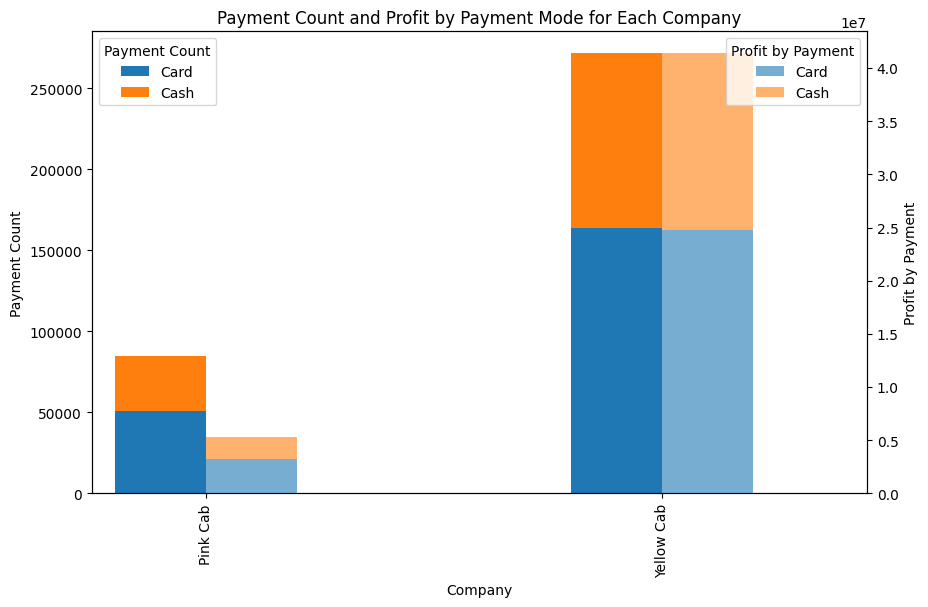

In [66]:
# Calculate payment count and profit by payment for each company
payment_count = transaction_data.groupby(['Company', 'Payment_Mode']).size().unstack(fill_value=0)
profit_by_payment = transaction_data.groupby(['Company', 'Payment_Mode'])['Profit'].sum().unstack(fill_value=0)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for payment count
payment_count.plot(kind='bar', stacked=True, ax=ax1, width=0.2, position=1)
ax1.set_ylabel('Payment Count')
ax1.tick_params(axis='y')
ax1.set_xlabel('Company')
ax1.set_title('Payment Count and Profit by Payment Mode for Each Company')

# Creating a second y-axis for profit by payment
ax2 = ax1.twinx()
profit_by_payment.plot(kind='bar', stacked=True, ax=ax2, width=0.2, position=0, alpha=0.6)
ax2.set_ylabel('Profit by Payment')
ax2.tick_params(axis='y')

# Legends
ax1.legend(title='Payment Count', loc='upper left')
ax2.legend(title='Profit by Payment', loc='upper right')

plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_2588\4042739811.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_payment = transaction_data.groupby('Payment_Mode')['Profit'].sum()


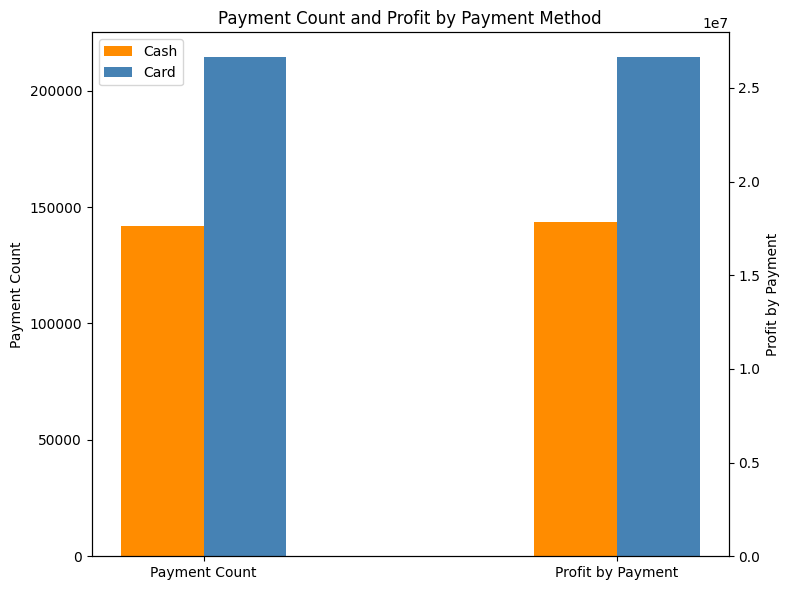

In [67]:
# Calculating metrics
payment_count = transaction_data['Payment_Mode'].value_counts()
profit_by_payment = transaction_data.groupby('Payment_Mode')['Profit'].sum()

# Creating a figure and a single set of axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Categories for the x-axis
categories = ['Payment Count', 'Profit by Payment']

# Payment count and profit by payment for each payment mode
counts = [payment_count['Cash'], payment_count['Card']]
profits = [profit_by_payment['Cash'], profit_by_payment['Card']]

# Normalizing profits to scale with counts for visualization
max_count = max(counts)
max_profit = max(profits)
profit_scaled = [profit * max_count / max_profit for profit in profits]

# Plotting
ind = np.arange(len(categories))  # the x locations for the groups
width = 0.2  # the width of the bars

# Bars for Cash and Card
ax1.bar(ind - width/2, [counts[0], profit_scaled[0]], width, label='Cash', color='darkorange')
ax1.bar(ind + width/2, [counts[1], profit_scaled[1]], width, label='Card', color='steelblue')

ax1.set_ylabel('Payment Count')
ax1.set_title('Payment Count and Profit by Payment Method')
ax1.set_xticks(ind)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')
ax1.tick_params(axis='y')

# Adding second y-axis for actual profit values
ax2 = ax1.twinx()
ax2.set_ylabel('Profit by Payment')
ax2.tick_params(axis='y')

# Ensuring the right y-axis labels reflect the actual profit values, not the scaled ones
ax2.set_ylim(0, max_profit)
ax2.plot([], [])  # Dummy plot for correct scaling

plt.tight_layout()
plt.show()


# **Hypothesis Results & Insights:**

## Hypothesis 1: Which company had higher transaction amounts from 2016 to 2018?
• Results: Over the three-year period, Yellow Cab had approximately 60,000 more transaction amounts on average than Pink Cab annually.  
**• Insights: Yellow Cab had higher transaction amounts than Pink Cab from 2016 to 2018, indicating a stronger market leadership, potentially higher customer trust or preference, and potential for sustained revenue growth.**  

## Hypothesis 2: Which company charges a higher average price per trip annually?
• Results: On average, Yellow Cab charged about $140 more per trip than Pink Cab each year over the same period.  
**• Insights: Yellow Cab charges a higher average price per trip than Pink Cab annually, suggesting Yellow Cab may offer premium services. Also, Yellow Cab has higher pricing power and brand value, indicating stronger revenue generation capabilities.**  

## Hypothesis 3: Which company incurs a higher average cost per trip annually?
• Results: Annually, Yellow Cab's average cost per trip was about $50 higher than that of Pink Cab over the three years.  
**• Insights: Yellow Cab incurs a higher average cost per trip annually compared to Pink Cab, which could reflect higher quality services but also indicates a need to manage costs effectively.**  

## Hypothesis 4: Which company achieves a higher average profit per trip annually?
• Results: Yellow Cab's average profit per trip exceeded Pink Cab's by roughly $90 annually during the three-year span.  
**• Insights: Yellow Cab achieves a higher average profit per trip than Pink Cab, highlighting better profitability per transaction, likely due to its pricing strategy and market positioning.**  

## Hypothesis 5: Which company has accumulated higher total profits from 2016 to 2018?
• Results: Yellow Cab accumulated a total of $36 million more in profit than Pink Cab from 2016 to 2018.  
**• Insights: Yellow Cab has accumulated higher total profits than Pink Cab from 2016 to 2018, reinforcing its financial strength and market leadership and supporting a promising investment opportunity.**  

## Hypothesis 6: What are the demographic segments for each company? (Gender, Age, Income Groups)
• Results:  
Gender Distribution: Yellow Cab served 77,000 more female and 110,000 more male customers than Pink Cab.  

Gender Profit Contribution: Yellow Cab generated \$14 million more in profit from female customers and \$21 million more from male customers compared to Pink Cab.  


Age Distribution: Customers aged 18-30 were the largest age group for Yellow Cab, followed by the 31-40, 51-65, and then 41-50 age groups. While Pink Cab had the same order for age distribution, Yellow Cab's customer count was higher in each age group. 
 
Age Profit Contribution: The profit contribution from customers aged 18-30 was the highest for Yellow Cab, followed by the same age groups as in its distribution. Yellow Cab's profit contribution from each age group was significantly higher than Pink Cab's. 
 
Income Groups Distribution: For Yellow Cab, the predominant income group was between the 25%-50% bracket (earning \$8400 to \$15000 per month), followed by the top 25% (earning more than \$21000 per month), the bottom 25% (earning less than \$8400 per month), and then the 50%-75% income bracket. Pink Cab showed the same order of income group distribution, but Yellow Cab had a considerably higher number of customers in each category. 
 
Income Groups Profit contribution: The pattern of profit contribution for Yellow Cab mirrored the distribution of income groups, with each group contributing more profit compared to Pink Cab.  

**• Insights: Yellow Cab appeals to a broader demographic in terms of gender, age, and income groups, suggesting its services meet a wide range of customer needs, enhancing its market reach and potential for market and revenue growth.**

## Hypothesis 7: How do the two companies compare in terms of profit generation across different cities?
• Results:  Yellow Cab generated the most profit in New York NY, followed by Washington DC, Los Angeles CA, Chicago IL, and Boston MA. 	Pink Cab's top profit-generating cities were New York NY, Los Angeles CA, San Diego CA, Silicon Valley, and Chicago IL  .

**• Insights: Both companies generate the most profit in New York NY, but Yellow Cab also leads in other major cities. This indicates Yellow Cab's strong urban presence and ability to capture key markets.**  

## Hypothesis 8: How does the payment method affect the transaction count and total profit for each company?
**• Results & Insights:
The preference for card payments over cash among passengers does not significantly affect profits for either company. This indicates flexibility in payment method is not a major differentiator but offering card payment options is essential**.

# Investment Recommendation:

 • **Market Leadership:** Yellow Cab has higher transaction amounts from 2016 to 2018, demonstrating strong market presence and customer preference. 
 
 • **Financial Performance:** Yellow Cab has a higher average profit per trip and overall profitability, suggesting a solid financial foundation and effective pricing strategy.  
 
 • **Broad Customer Base:** Yellow Cab appeals to a wide demographic, indicating versatile service offerings that cater to diverse customer needs.  
 
 • **Strong Urban Presence:** Yellow Cab's significant profit generation in major cities shows its successful penetration in high-demand urban markets, promising for future growth.  
 
 • **Payment Flexibility:** The non-significant impact of payment method on profits suggests operational efficiency in handling transactions, appealing to customer convenience.
#### **On the basis of above points, we recommend Yellow Cab for investment.**